## goals-analysis-evaluation

## Goal setting
Since this project is meant for practicing machine learning, my focus will be selecting a variable that, based on common sense, can probably be predicted by certain variables. I decided that factors that reflect one's personality traits can probably predict one's atrological sign. 

Below are the variables that reflect personality traits and therefore, could be related to one's sign. 

"""cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       , 'job', 'signsCleaned']"""
       
What's the use of predicting one's sign, however? If the predictability turns out good, we can fill in the missing sign values (59946-48890=11,056), which we found to say something about someone's personality traits for others to consider. 

### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

profiles=pd.read_csv('profiles.csv')

print(profiles.columns)
print(len(profiles.columns))

#Overview of columns
print(profiles.info())

#Specific columns
for item in profiles.columns:
    if len(profiles[item].unique()) <=5:
        print(item,profiles[item].unique())
        
profiles.drugs.value_counts()
profiles.offspring.value_counts()
max(profiles.age),min(profiles.age)
print(profiles.location.nunique())
print(profiles.body_type.unique())
print(profiles.income.unique())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  e

Stuck. As there are only three numerical columns, what kind of correlations am I supposed to do?
Also, what am I tasked with? Working to improve the system? Find my own perfect match?
=>Need to represent categorical values with zeros and ones. 
=>The solution aims to improve the system by filling in the missing values. 

In [2]:
profiles.head()
# profiles.iloc[0:5,6:16]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Explore and modify the data

#### Handle the target (i.e. variable being predicted)

In [3]:
#Clean the sign values
profiles['sign'].unique()
# profiles['sign_cleaned']=profiles['sign'].str.split()[0]
# profiles['sign_cleaned']=profiles['sign'].str.split().get[0]
profiles['signsCleaned']=profiles['sign'].str.split().str.get(0)
#I found the above correct expression awkward: I suppose we access the first word through indexing only when taking it as a list, but it has "str" between split and get(0)
print(profiles['signsCleaned'].head())

print(profiles.columns)

0      gemini
1      cancer
2      pisces
3      pisces
4    aquarius
Name: signsCleaned, dtype: object
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'signsCleaned'],
      dtype='object')


## One thing I miss before turning to the predictors: check whether the labels of the target (i.e. prediction labels) are balanced enough so that each label has some instances in the training set.

In [4]:
profiles['signsCleaned'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

#### Handle the predictors. First the continuous variables: age, height,income

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'signsCleaned'],
      dtype='object')


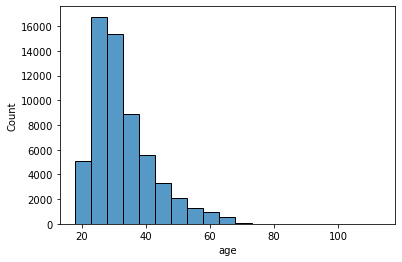

In [5]:

"""columns:
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
      """
# sns.histplot(data=profiles,x='age')#The lines turned out to be very thin
sns.histplot(data=profiles,x='age',binwidth=5)
print(profiles.columns)

<AxesSubplot:xlabel='age', ylabel='Count'>

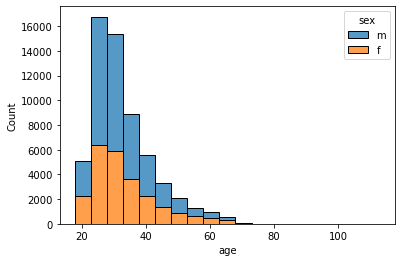

In [6]:
sns.histplot(data=profiles,x='age',hue='sex',binwidth=5,multiple = "stack")
#Without "multiple ='stack'", the result will be two overlapped histgrams

<AxesSubplot:xlabel='height', ylabel='Count'>

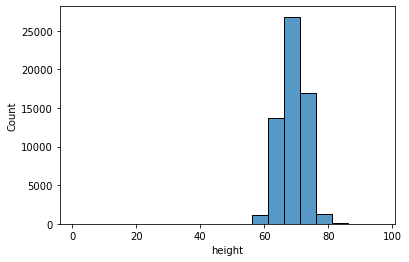

In [7]:
sns.histplot(data=profiles,x='height',binwidth=5)

In [8]:
# sns.histplot(data=profiles,x='income',binwidth=5)#12/11 Q Can't come out

#### Handling the predictors: the discrete ones

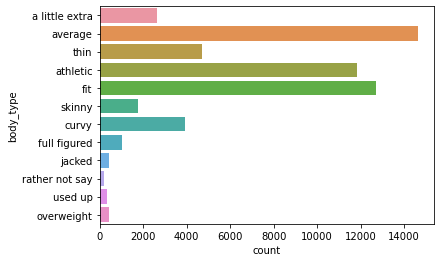

In [9]:
"""columns:
Index(['body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity','job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
"""
# sns.countplot(data=profiles,x='body_type')
sns.countplot(data=profiles, y="body_type");#Note that the variables are represented at the y-axis 

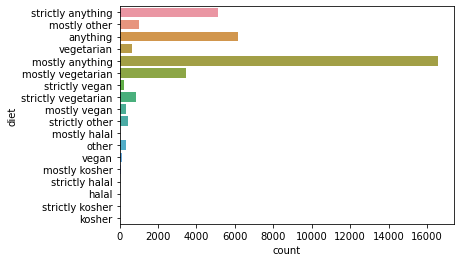

In [10]:
sns.countplot(data=profiles, y="diet");

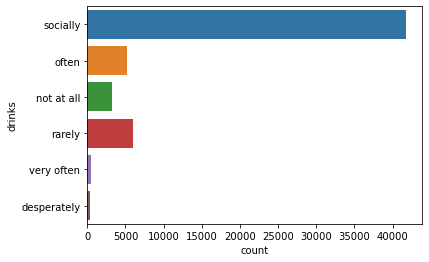

In [11]:
sns.countplot(data=profiles, y="drinks");

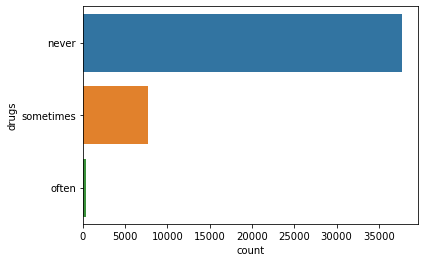

In [12]:
sns.countplot(data=profiles, y="drugs");

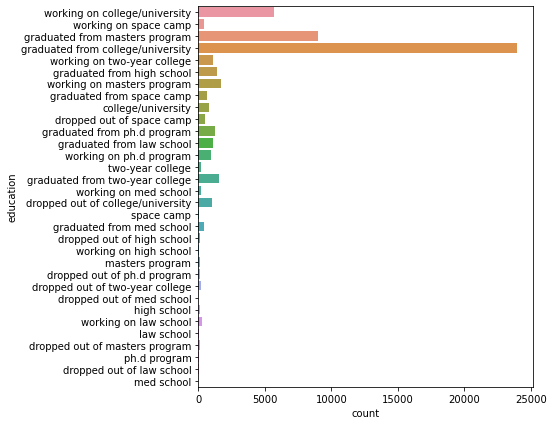

In [13]:
# sns.countplot(data=profiles, y="education");#Jammed

plt.figure(figsize=(6,7))#Orignal:figsize=(6.4,4.8)
sns.countplot(data=profiles,y='education');
#sns.countplot(titanic, x="class", hue="survived", stat="percent")

<AxesSubplot:xlabel='count', ylabel='ethnicity'>

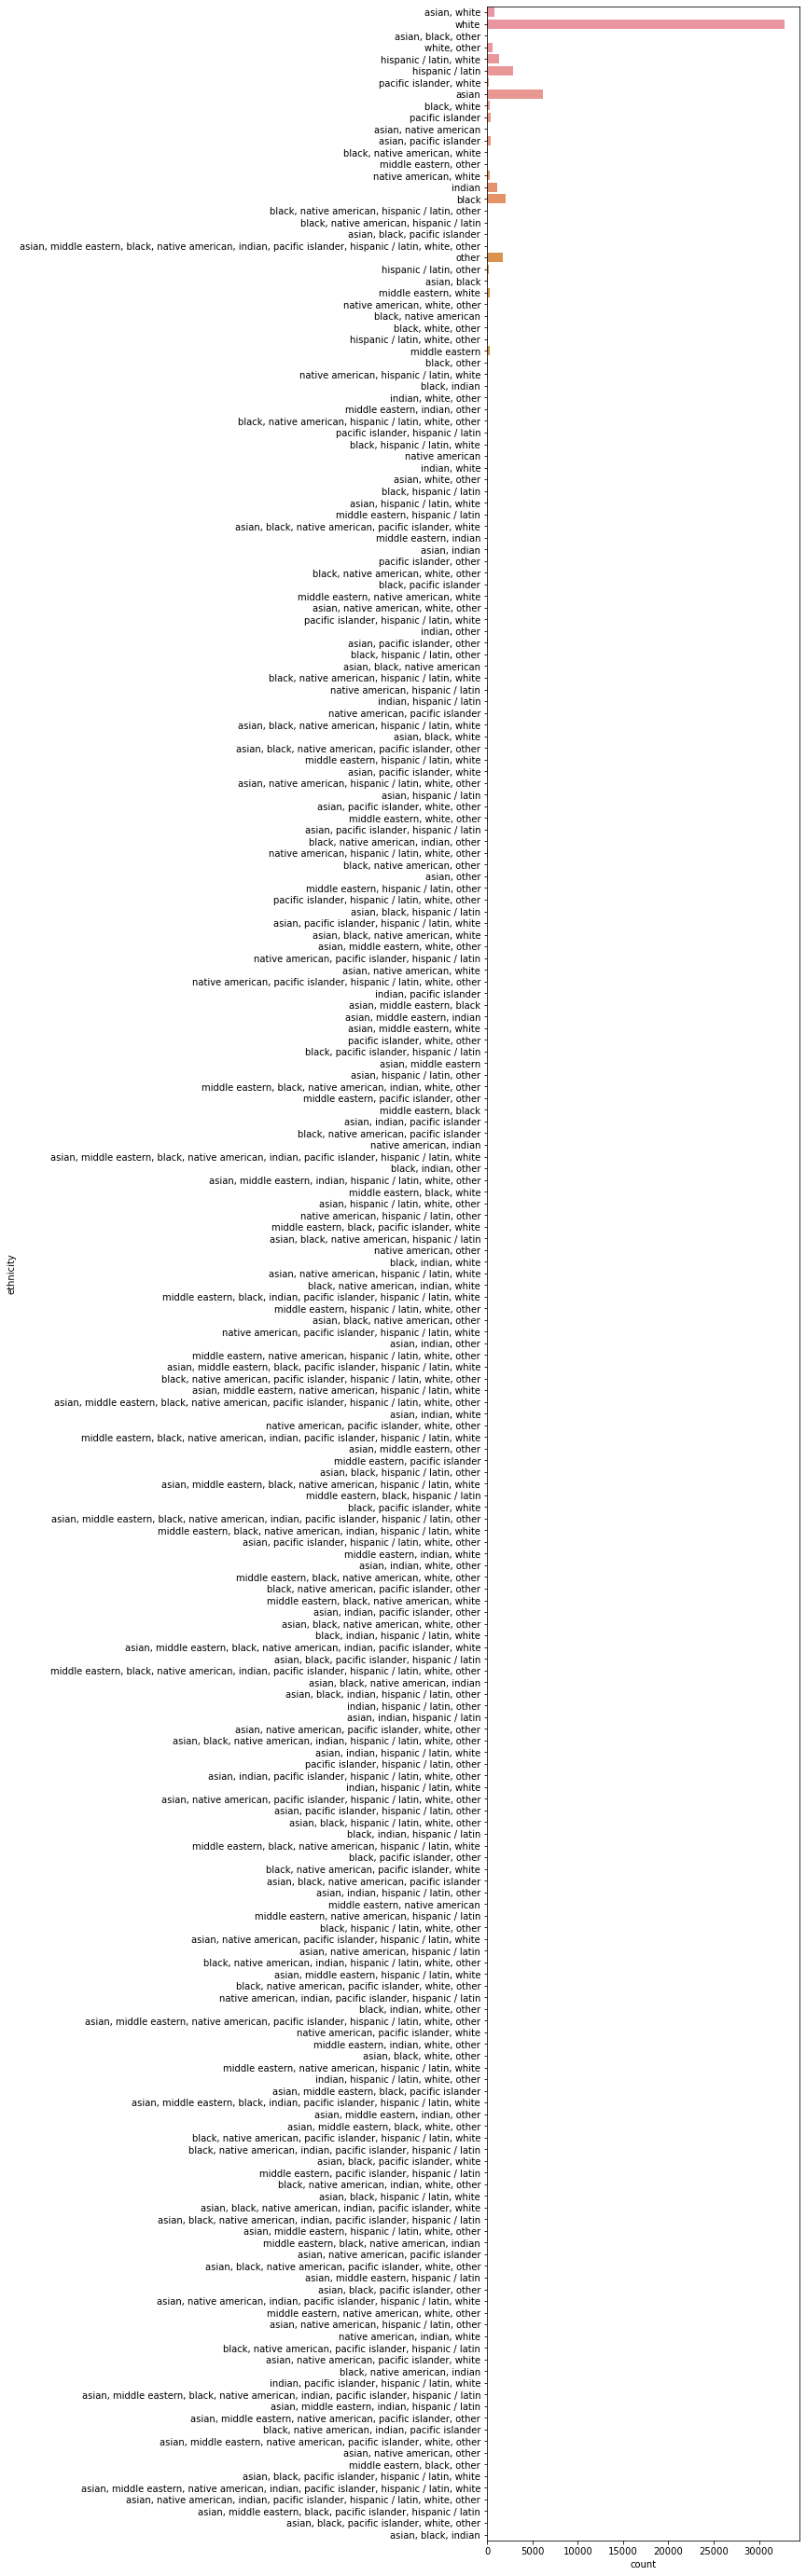

In [14]:
plt.figure(figsize=(6,50))
sns.countplot(data=profiles,y='ethnicity')#Interestingly, CA doesn't plot it. #Can I group it somehow

<AxesSubplot:xlabel='count', ylabel='job'>

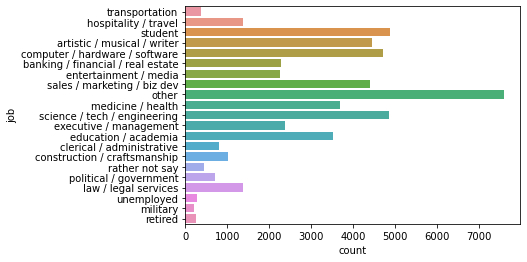

In [15]:
sns.countplot(data=profiles,y='job')

<AxesSubplot:xlabel='count', ylabel='offspring'>

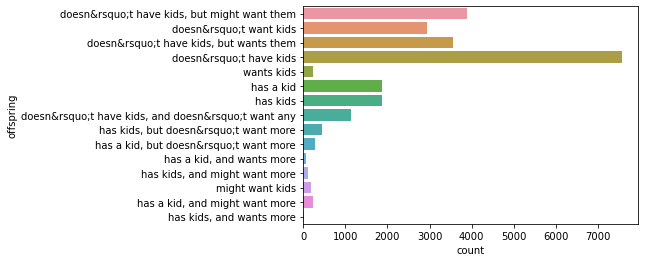

In [16]:
"""remaining discrete variables:
'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'"""
sns.countplot(data=profiles,y='offspring')

<AxesSubplot:xlabel='count', ylabel='orientation'>

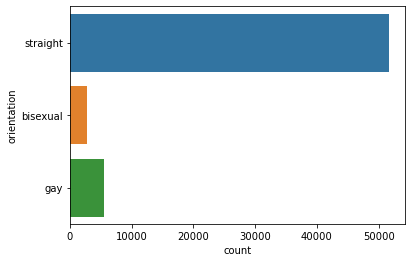

In [17]:
sns.countplot(data=profiles,y='orientation')

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'signsCleaned'],
      dtype='object')


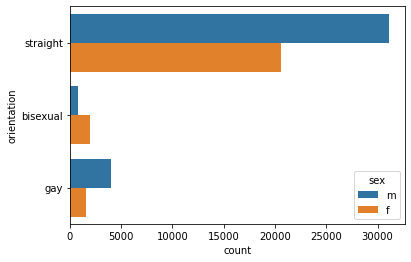

In [18]:
sns.countplot(data=profiles,y='orientation',hue='sex')
print(profiles.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'signsCleaned'],
      dtype='object')


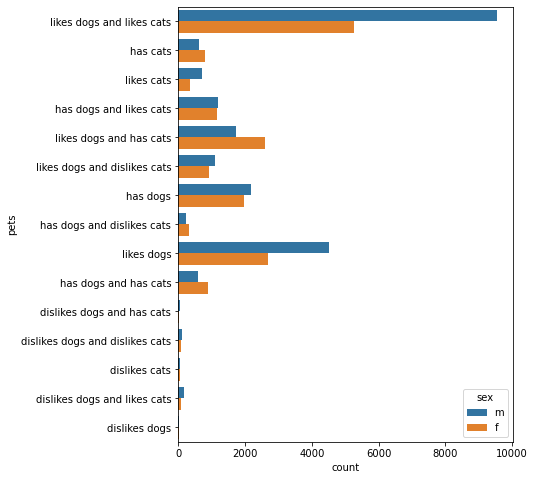

In [19]:
plt.figure(figsize=(6,8))##Why can this work and the above doesn't?
sns.countplot(data=profiles,y='pets',hue='sex')
print(profiles.columns)

In [20]:
print(profiles.columns)
"""remaining discrete variables:
 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'"""


Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'signsCleaned'],
      dtype='object')


"remaining discrete variables:\n 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'"

In [21]:
# plt.figure(figsize=(6,20))
# sns.countplot(data=profiles,y='religion')#Way too complex; group it.
profiles['religionCleaned']=profiles['religion'].str.split().str.get(0)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'signsCleaned',
       'religionCleaned'],
      dtype='object')


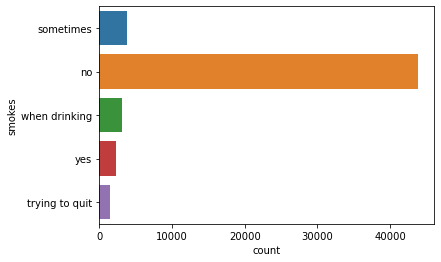

In [22]:
sns.countplot(data=profiles,y='smokes')
print(profiles.columns)

In [23]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'job', 'signsCleaned']
#As the classification reports prove terrible, I decided to use the same featues as CA by adding "sex"

# cols = ['sex','body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'job', 'signsCleaned']

### Build models 

In [24]:
simpProfile=profiles[cols]
print(simpProfile.columns)
#Be sure to dropna before distinguishing between X and y to ensure that the two has the same number of rows

simpProfile=simpProfile.dropna()#Q Somehow, if i add inplace=true, errors occur

X=simpProfile.iloc[:,:-1]
y=simpProfile.iloc[:,-1]


print(len(X))
print(len(y))

Index(['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'job',
       'signsCleaned'],
      dtype='object')
16453
16453


In [25]:
#Convert categorical values to numerals

"""CA:
df = profiles[cols].dropna()"""
X=pd.get_dummies(X)
print(f"number of features:{len(X.columns)}")

"""CA:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])"""

"""X=pd.get_dummies(所有欄位)"""

"""CA:
turn y into 1d arrays
Y_train = Y_train.to_numpy().ravel()#Ravel turn multi-D objects to 1-D ones
Y_val = Y_val.to_numpy().ravel()"""
# print(X.shape)
# print(y.shape)#So y is 1-D


number of features:78


'CA:\nturn y into 1d arrays\nY_train = Y_train.to_numpy().ravel()#Ravel turn multi-D objects to 1-D ones\nY_val = Y_val.to_numpy().ravel()'

In [26]:
from sklearn.model_selection import train_test_split #Import this only when in use to avoid running the previous code all over again
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)#X first and y 
print(x_train.shape)
print(y_train.shape)

y_train=y_train.to_numpy().ravel()#to_numpy: df to numpy, ravel: multi to 1-D
y_test=y_test.to_numpy().ravel()

(12339, 78)
(12339,)


#### multiple logistic regression
Linear regression provides a continuous output but Logistic regression provides discrete output.

While I don't recall the previous classes say so, logistical regressors can solve MULTICLASS PROBLEMS. 


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# lr=LogisticRegression()
#lr.fit(x_train,y_train)#This is meant for binary classification
"""
CA:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
"""

lr=LogisticRegression(multi_class="multinomial")
lr.fit(x_train,y_train)
# lr_pred=lr.predict(x_test)#CA says "x_train." But why?
lr_pred=lr.predict(x_train)
# lr_predictions = lr_model.predict(X_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Metrics imported
from sklearn.metrics import classification_report#This can get all the meterics
# print(classification_report(y_test,lr_pred))#CA uses "y_train." Why?
print(classification_report(y_train,lr_pred))
      
"""
CA:
print(classification_report(Y_train, lr_predictions))
"""

              precision    recall  f1-score   support

    aquarius       0.14      0.06      0.09       968
       aries       0.11      0.10      0.10       983
      cancer       0.12      0.24      0.16      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.11      0.14      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.12      0.08      0.09       997
 sagittarius       0.14      0.10      0.11       965
     scorpio       0.14      0.06      0.08      1001
      taurus       0.13      0.13      0.13      1045
       virgo       0.12      0.19      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.11     12339



'\nCA:\nprint(classification_report(Y_train, lr_predictions))\n'

## Q CA's final accuracy is 12%, while mine is 9%, which is near a random guess. Is it because the model wasn't trained as supposed, as suggested by the"ConvergenceWarning" ?

Possible answer: As suggested here 
(https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter), I need to do *something* to make convergence happen (i.e.optimized parameters identified)

#### Q However, did CA's solution did that *something*? If so, what is it that makes the difference?
A: Some of the hypotheses include 

(a) CA's test_size (actually eval_size is 0.25, mine is 0.2)

=>tried, didn't help 

(b) CA's features: 80, mine is 78: I took a look at his features and mine and found that he used the below to get_dummies from
CA_features = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
My_features=['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'job',
       'signsCleaned'],
       
#### =>Yeah, with the additional feature that CA used-- "sex", the scores are *a bit better*.     
(c) Try a different model: Which I will do anyway.

(d) Because the report is based on x_train rather than x_test?
## =>*YES!*
#### I didn't use "sex" as I think it has nothing to do with astrology. 

#### KNN

In [29]:
"""
CA:
The next models is the KNeighborsClassifier 
which will take 20 of it's neighbors to predict the signs. 
The default value for n_neighbors is 5 which was kept"""

#Q:So we're considering 20 or 5 neighbors?

"\nCA:\nThe next models is the KNeighborsClassifier \nwhich will take 20 of it's neighbors to predict the signs. \nThe default value for n_neighbors is 5 which was kept"

In [30]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train)
# knn_pred=knn_model.predict(x_test)
knn_pred=knn_model.predict(x_train)
# print(classification_report(y_test,knn_pred))
print(classification_report(y_train,knn_pred))

              precision    recall  f1-score   support

    aquarius       0.25      0.63      0.36       968
       aries       0.26      0.50      0.34       983
      cancer       0.29      0.41      0.34      1129
   capricorn       0.31      0.30      0.31       882
      gemini       0.34      0.29      0.31      1130
         leo       0.39      0.32      0.35      1121
       libra       0.41      0.26      0.32      1028
      pisces       0.39      0.26      0.31       997
 sagittarius       0.39      0.20      0.27       965
     scorpio       0.39      0.22      0.28      1001
      taurus       0.43      0.25      0.31      1045
       virgo       0.41      0.25      0.31      1090

    accuracy                           0.32     12339
   macro avg       0.35      0.33      0.32     12339
weighted avg       0.36      0.32      0.32     12339



### DecisionTree

"""The last model is the decision tree, the default `max_depth` is `none` 
which means that it will "If None, then nodes are expanded 
until all leaves are pure or until all leaves contain less than min_samples_split samples.". 
The results are very promising because it has a 78% accuracy with this model."""

In [31]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
# dt_pred=dt.predict(x_test)
dt_pred=dt.predict(x_train)
# print(classification_report(y_test,dt_pred))
print(classification_report(y_train,dt_pred))

              precision    recall  f1-score   support

    aquarius       0.62      0.90      0.74       968
       aries       0.60      0.85      0.70       983
      cancer       0.66      0.81      0.73      1129
   capricorn       0.69      0.79      0.74       882
      gemini       0.72      0.74      0.73      1130
         leo       0.76      0.74      0.75      1121
       libra       0.77      0.72      0.74      1028
      pisces       0.75      0.67      0.71       997
 sagittarius       0.87      0.65      0.74       965
     scorpio       0.83      0.64      0.72      1001
      taurus       0.85      0.65      0.74      1045
       virgo       0.89      0.61      0.72      1090

    accuracy                           0.73     12339
   macro avg       0.75      0.73      0.73     12339
weighted avg       0.75      0.73      0.73     12339



### Below is a heatmap that visualize the accuracy of decision tree--so far.

In [32]:
from sklearn.metrics import confusion_matrix
dt_cm=confusion_matrix(y_train,dt_pred)
dt_labels=dt.classes_#The final dash is indicates an attribute of a method#The target classes

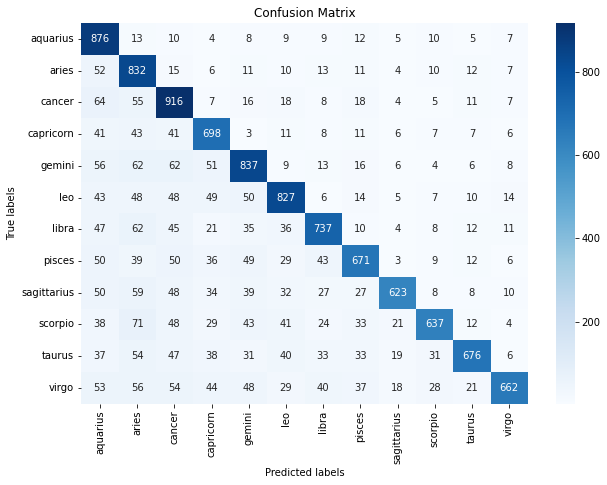

In [33]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, ax = ax,fmt="d",cmap='Blues');#The first one is the data #Q Why the final semi-colon?

# labels, title and ticks
ax.set_xlabel('Predicted labels');#Take the second argument of confusion_matrix() as x values
ax.set_ylabel('True labels'); #Take the first argument of confusion_matrix() as y values
ax.set_title('Confusion Matrix');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels); 
ax.yaxis.set_ticklabels(dt_labels);
#Note that in a heatmap(i.e. confusion matrix), labels for x , and y axes the same?

### So the previous y_train-based evaluations are meant for deciding *the most hopeful model*, which seems to be DecisionTree.

### However, with decision tree, we must make sure there's no *overfitting* 
### Deep depths, for example, indicates overfitting. 

In [34]:
dt.get_depth()

50

### Although I'm not sure about the reasonable range of depths, 50 is, according to CA, way too much, hence the risk of overfitting. This doesn't mean we're giving up the model altogether. Instead, we'll see if trimming will retain the accuracy. 

In [35]:
dt=DecisionTreeClassifier(max_depth=20)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_train)
print(classification_report(y_train,dt_pred))

              precision    recall  f1-score   support

    aquarius       0.45      0.40      0.42       968
       aries       0.32      0.44      0.37       983
      cancer       0.26      0.51      0.34      1129
   capricorn       0.53      0.35      0.42       882
      gemini       0.33      0.38      0.35      1130
         leo       0.29      0.46      0.36      1121
       libra       0.45      0.29      0.36      1028
      pisces       0.63      0.28      0.39       997
 sagittarius       0.64      0.29      0.40       965
     scorpio       0.35      0.32      0.33      1001
      taurus       0.53      0.34      0.41      1045
       virgo       0.35      0.35      0.35      1090

    accuracy                           0.37     12339
   macro avg       0.43      0.37      0.38     12339
weighted avg       0.42      0.37      0.37     12339



## The f1-score of Decision Tree 0.38 is slighter higher than KNN's 0.32

## Although Decision Tree has again did best, a cross-validation is in place to avoid potential bias from the current train-test split.  

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Specify the split times
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
results=cross_val_score(dt,x_train,y_train,cv=kfold,scoring='accuracy')
#It seems that kfold can't run sth like classification report but have to choose one
"""If I hadn't given kfold extra parameter specifications like shuffle and random_state or not, 
I can simply give cv a number"""

print(np.mean(results))#The averaged score of the 5 testing
print(np.std(results))#To check if the experiments' have high variance

0.08307000871799487
0.004950380359324364


The accuracy across the 5 testing is a mere 0.0827457610638713, about the same as a random guess. 
## So we turn to the second-best in classification reports
### Despite no concerns about overfitting, KNN has to stand the test of cross validation

In [37]:
"""knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train)
# knn_pred=knn_model.predict(x_test)
knn_pred=knn_model.predict(x_train)
# print(classification_report(y_test,knn_pred))
print(classification_report(y_train,knn_pred))"""
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
results=cross_val_score(knn_model,x_train,y_train,cv=kfold,scoring='accuracy')
#Don't forget the parametr "score"
print(f"mean score:{np.mean(results)}")
print(f"SD:{np.std(results)}")

mean score:0.08671652194707578
SD:0.010680393744978662


#### KNN did a little better, so CA went on the find out its score metrics--
### with the held out *evaluation set*.

In [39]:
knn_pred=knn_model.predict(x_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.12       294
       aries       0.08      0.15      0.11       345
      cancer       0.09      0.16      0.12       328
   capricorn       0.09      0.07      0.08       315
      gemini       0.06      0.05      0.06       366
         leo       0.08      0.06      0.07       395
       libra       0.06      0.04      0.05       326
      pisces       0.08      0.06      0.07       337
 sagittarius       0.11      0.05      0.07       347
     scorpio       0.08      0.05      0.06       355
      taurus       0.09      0.05      0.06       345
       virgo       0.08      0.05      0.06       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.08      4114
weighted avg       0.08      0.08      0.08      4114



### While doing better than Decision Tree with the cross-validation, KNN's performance in the validation set is again similar to that of the Decision Tree. 
#### Nevertheless, instead of giving up of KNN and considering DT again, CA simply take a look at the values where KNN predicts worst.

In [43]:
knn_cm=confusion_matrix(y_test,knn_pred)
knn_labels=knn_model.classes_

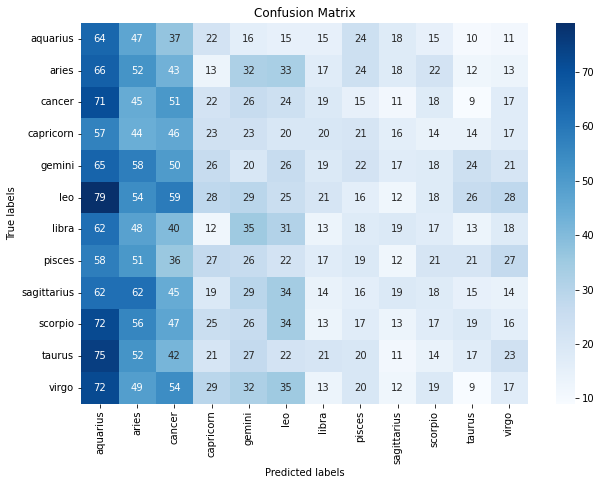

In [44]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(knn_cm, annot=True, ax = ax,fmt="d",cmap='Blues');#The first one is the data #Q Why the final semi-colon?
#I found that when cmap ='Blues', the contrast between different colors is not apparent enough. Will use CA's


# labels, title and ticks
ax.set_xlabel('Predicted labels');#Take the second argument of confusion_matrix() as x values
ax.set_ylabel('True labels'); #Take the first argument of confusion_matrix() as y values
ax.set_title('Confusion Matrix');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);


Q1: (about solution) Since we're sure signas have nothing to do with age, why do we analyze age?

Below is CA's color scheme, which clearly shows high FPs for aquarius, aries, and cancer

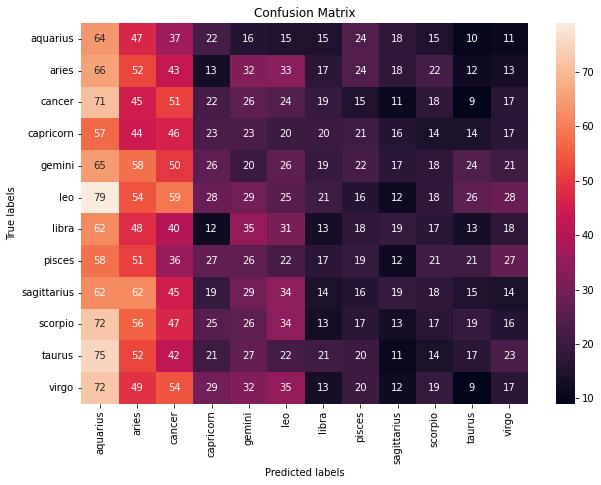

In [45]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(knn_cm, annot=True, ax = ax,fmt="d");#The first one is the data 
#Q Why the final semi-colon?


# labels, title and ticks
ax.set_xlabel('Predicted labels');#Take the second argument of confusion_matrix() as x values
ax.set_ylabel('True labels'); #Take the first argument of confusion_matrix() as y values
ax.set_title('Confusion Matrix');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);


### Below are CA's suggested future work:
1. Quesion: Reonsider whether it is possible to predict user's astrological signs period

2. Data: If there is a way to do with more data. 

3. Models: Add additional models 

4. Parameters: Tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms.